In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time  # для измерения времени выполнения

# Модели
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Метрики
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
X = df.drop(columns=['Outcome'])  # Признаки
y = df['Outcome']  # Целевая переменная

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

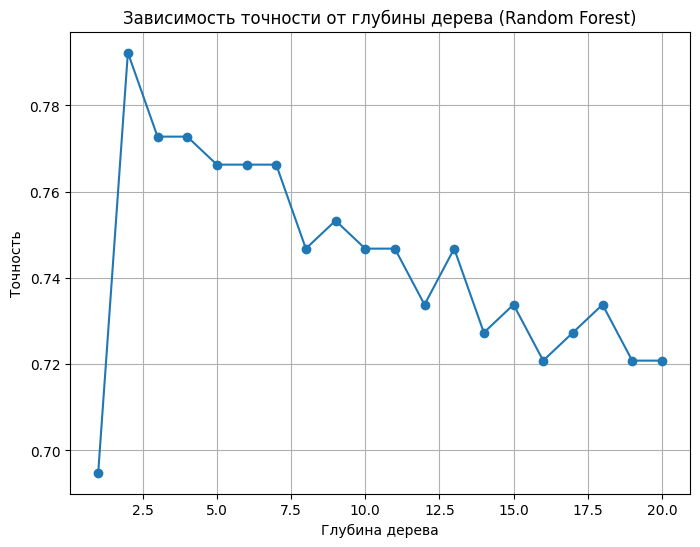

In [ ]:
# Исследование влияния глубины дерева на точность
depths = np.arange(1, 21)  # Проверим глубины от 1 до 20
accuracies = []

for depth in depths:
    rf_model = RandomForestClassifier(max_depth=depth, random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Построение графика зависимости точности от глубины дерева
plt.figure(figsize=(8, 6))
plt.plot(depths, accuracies, marker='o')
plt.xlabel("Глубина дерева")
plt.ylabel("Точность")
plt.title("Зависимость точности от глубины дерева (Random Forest)")
plt.grid(True)
plt.show()

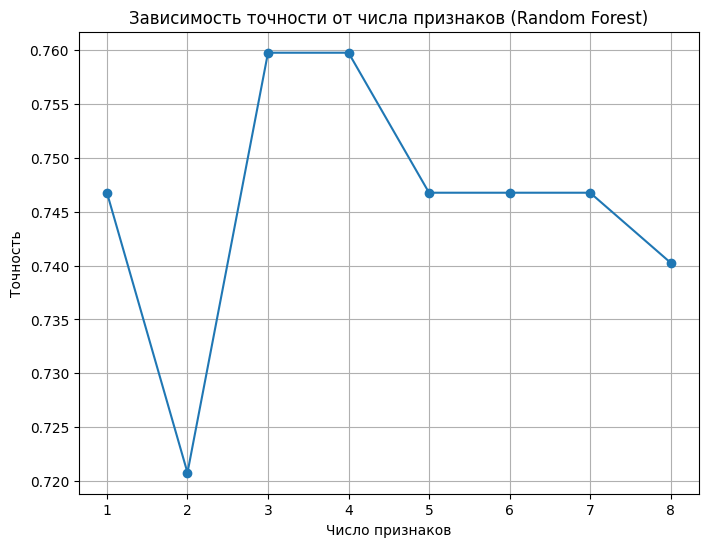

In [ ]:
# Исследование качества модели от числа признаков (max_features)
features = np.arange(1, X_train.shape[1] + 1)  # Число признаков от 1 до количества признаков в датасете
accuracies = []

for feature in features:
    rf_model = RandomForestClassifier(max_features=feature, random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Построение графика зависимости точности от числа признаков
plt.figure(figsize=(8, 6))
plt.plot(features, accuracies, marker='o')
plt.xlabel("Число признаков")
plt.ylabel("Точность")
plt.title("Зависимость точности от числа признаков (Random Forest)")
plt.grid(True)
plt.show()

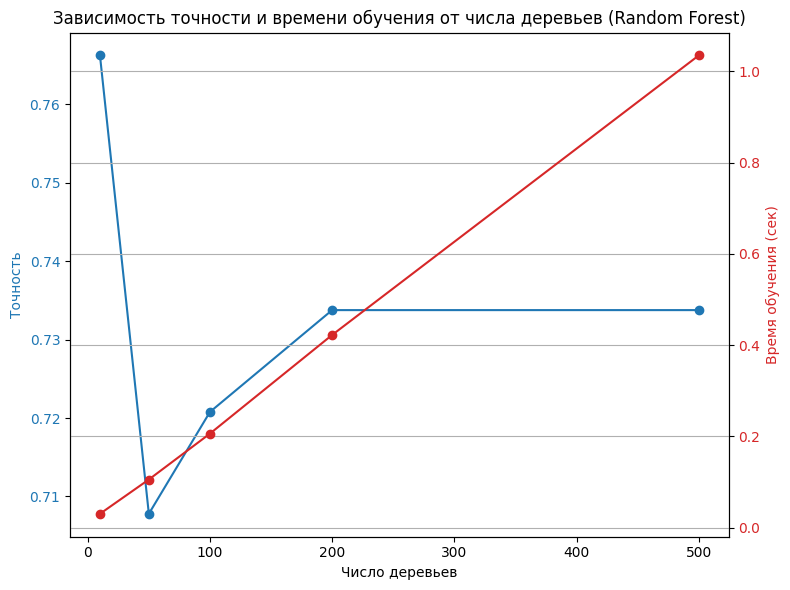

In [ ]:
# Исследование зависимости качества и времени обучения от числа деревьев
n_trees = [10, 50, 100, 200, 500]
accuracies = []
times = []

for n in n_trees:
    start_time = time.time()
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    times.append(time.time() - start_time)

# Построение графиков зависимости точности и времени обучения от числа деревьев
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:blue'
ax1.set_xlabel('Число деревьев')
ax1.set_ylabel('Точность', color=color)
ax1.plot(n_trees, accuracies, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Время обучения (сек)', color=color)
ax2.plot(n_trees, times, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Зависимость точности и времени обучения от числа деревьев (Random Forest)")
fig.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# Обучение и тестирование модели XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

start_time = time.time()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_time = time.time() - start_time

# Оценка модели XGBoost
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(f"Точность: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Время обучения: {xgb_time:.4f} секунд")

# Сравнение результатов с Random Forest
print("\nRandom Forest (последняя настройка):")
print(f"Точность: {accuracies[-1]}")
print(f"Время обучения: {times[-1]:.4f} секунд")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:16:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

Точность: 0.7077922077922078
Время обучения: 3.5627 секунд

Random Forest (последняя настройка):
Точность: 0.7337662337662337
Время обучения: 1.0346 секунд
